In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
figsize_x = 14
figsize_y = 6


In [2]:
data= "C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\home_price.csv"

In [3]:
home_price= pd.read_csv(data)


In [4]:
gp_state=home_price.groupby('State').median()

gp_state.columns=["Median Home Price"]
gp_state.head()

,Median Home Price
State,
AK,310387.50
AL,133891.67
AR,127237.50
AZ,240816.67
CA,560075.00


In [5]:
median_homepricedf = pd.DataFrame(gp_state)
median_homepricedf.to_csv("C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\median_homeprice.csv", index=True, header=True)

In [6]:
totaltaxdf = "C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\Total taxes by State.CSV"
totaltax_bystate = pd.read_csv(totaltaxdf)
totaltax_bystate.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,Total Tax
0,AL,"11,055,577"
1,AK,"1,641,733"
2,AZ,"16,293,917"
3,AR,"9,843,173"
4,CA,"175,016,884"


In [7]:
tax_homeprice = pd.merge(totaltax_bystate,median_homepricedf, on = 'State')
tax_homeprice.head()


,State,Total Tax,Median Home Price
0,AL,"11,055,577",133891.67
1,AK,"1,641,733",310387.50
2,AZ,"16,293,917",240816.67
3,AR,"9,843,173",127237.50
4,CA,"175,016,884",560075.00


In [8]:
totaltax_medianhomeprice=pd.DataFrame(tax_homeprice)

In [9]:
totaltax_medianhomeprice.to_csv("C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\TotalTax_MedianHomePrice.csv", index=True, header=True)

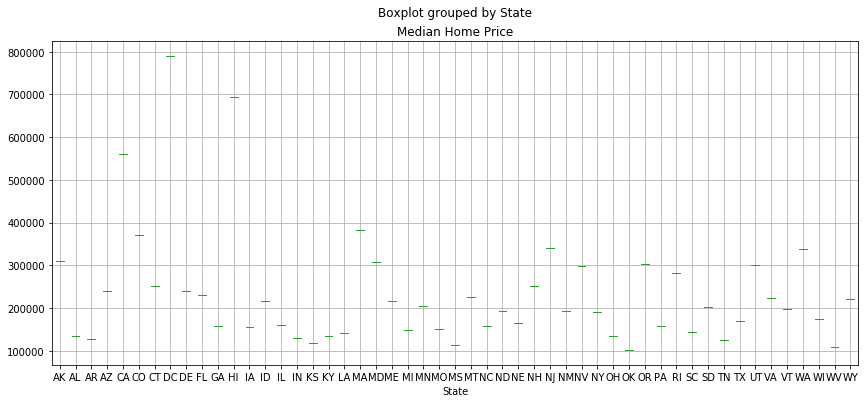

In [10]:
# Create a boxplots to visualize the spread for Median Home Price

gp_state.boxplot("Median Home Price", by="State", figsize=(figsize_x ,figsize_y))

Text(0, 0.5, 'Median Home Price')

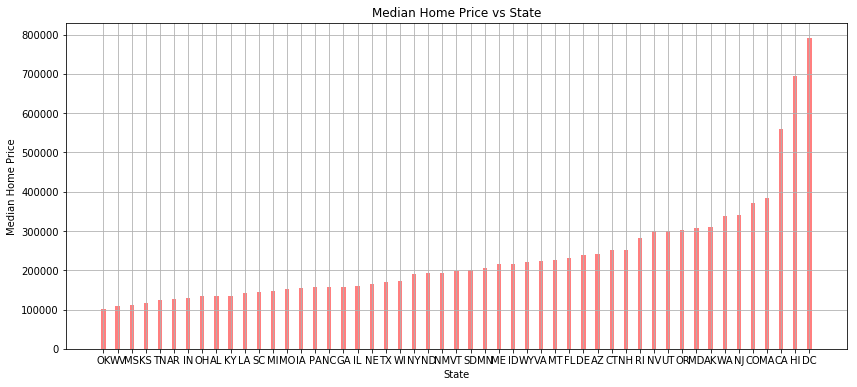

In [11]:
#Sorting the home price
sortedhomeprice = totaltax_medianhomeprice.sort_values(by=['Median Home Price'])
#plot Median HomePrice as bar chart

fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
medianhomepricebar=plt.bar(sortedhomeprice['State'],sortedhomeprice['Median Home Price'],
                           color='r',width=0.3, align='center', alpha=0.5 )

plt.title('Median Home Price vs State')
ax1.grid()
ax1.set_xlabel("State")
ax1.set_ylabel("Median Home Price")




In [15]:
#casting Total Tax column from str to int

sortedhomeprice['Total Tax'] = sortedhomeprice['Total Tax'].str.replace(',','')

sortedhomeprice['Total Tax'] = sortedhomeprice['Total Tax'].astype(int)
sortedhomeprice.dtypes



State                 object
Total Tax              int32
Median Home Price    float64
dtype: object

In [33]:
sorttax = totaltax_medianhomeprice.sort_values(by=['Total Tax'])
sorttax['Total Tax'] = sorttax['Total Tax'].str.replace(',','')
sorttax['Total Tax'] = sorttax['Total Tax'].astype(int)
sorttax.dtypes


State                 object
Total Tax              int32
Median Home Price    float64
dtype: object

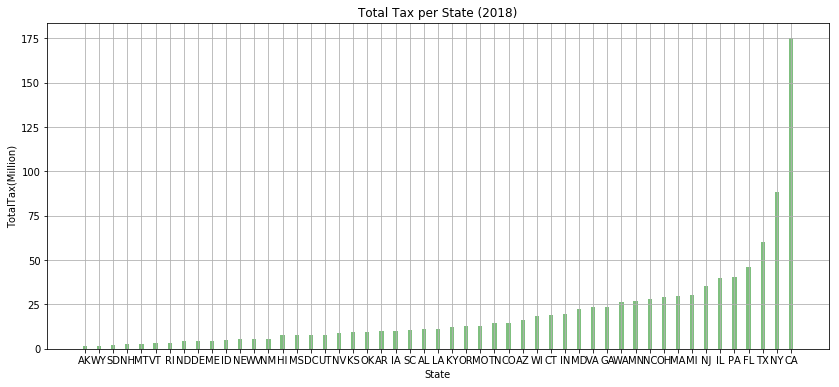

In [34]:
sorttax1 = sorttax.sort_values(by=['Total Tax'])
fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
taxratebar = plt.bar(sorttax1['State'] ,sorttax1['Total Tax']/1000000 
                     , color='g',width=0.3, align='center', alpha=0.5)
plt.title('Total Tax per State (2018)')


ax1.grid()
ax1.set_xlabel("State",rotation=0)
ax1.set_ylabel("TotalTax(Million)")
plt.savefig('C:\\Users\\Spring\Desktop\\The Incredible Quad\\Images\\Totaltax per state.png')


In [35]:
sorttax1.head()

,State,Total Tax,Median Home Price
1,AK,1641733,310387.500
50,WY,1837401,220241.665
41,SD,1917548,201525.000
29,NH,2920888,250870.835
26,MT,2944827,225283.330


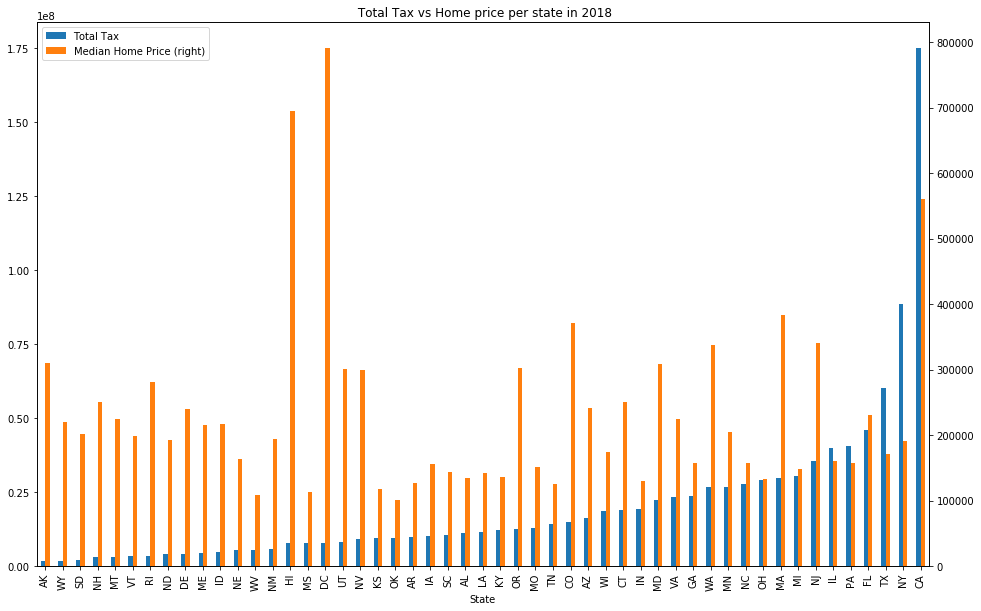

In [37]:
sorttax1 = sorttax1.set_index('State')
gbar=sorttax1.plot(kind= 'bar', secondary_y = 'Median Home Price', figsize= (16,10) ,rot =90)
plt.title(' Total Tax vs Home price per state in 2018')

#save the fig
plt.savefig('C:\\Users\\Spring\\Desktop\\The Incredible Quad\\Images\\Total Tax vs Home Price.png')


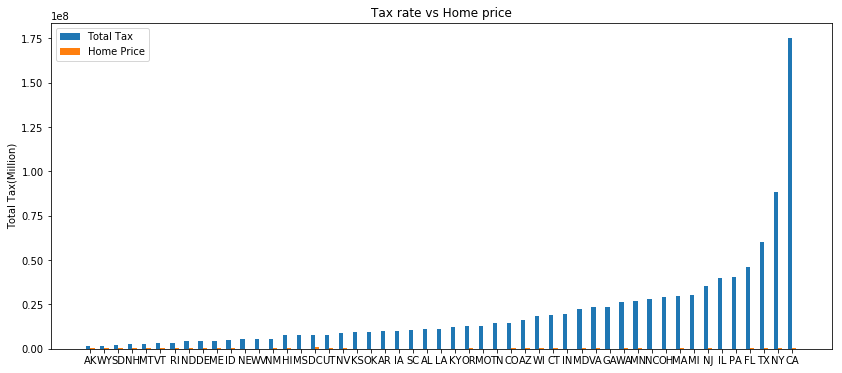

In [25]:
#create a plot with both dataset (homeprice and TotalTax)
labels = sorttax['State']
x = np.arange(len(labels))  #the labels locations
width = 0.3

fig, ax =plt.subplots(figsize=(figsize_x, figsize_y))
rects1 = ax.bar(x- width/2 , sorttax['Total Tax'] ,width, label= 'Total Tax')
rects2 = ax.bar(x+ width/2 , sorttax['Median Home Price'] , width , label= 'Home Price')

ax.set_ylabel('Total Tax(Million)')
ax.set_title('Tax rate vs Home price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()